#영화 추천 시스템 - 기초

###해당 프로젝트는 kaggle에서 Getting Started with a Movie Recommendation System 데이터를 사용하여 기초적인 추천 시스템을 구현해보는 프로젝트입니다.


###**1. Demographic Filtering**

- Demographic(인구 통계학적) 추천은 사용자의 인구통계학적 정보(profile)를 기반으로 추천을 제공한다. 추천된 제품은 그 영역의 사용자들의 평가들을 합침으로써 다른 인구통계학적 영역을 위해 만들어질 수 있습니다.

- 유저들에 대한 정보를 활용하여 추천하는 방식을 의미하며 간단하게 많은 유저가 좋아하는 것을 다른 유저도 좋아할 것이다 와 같은 맥락으로 추천을 해주는 알고리즘입니다.

In [ ]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('/content/drive/MyDrive/Recommend system/basic/credits.csv')
df2=pd.read_csv('/content/drive/MyDrive/Recommend system/basic/movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(df1.columns)
print(df2.columns)

Index(['cast', 'crew', 'id'], dtype='object')
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
print(df1.shape)
print(df2.shape)

(45476, 3)
(45466, 24)


In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
#데이터 합치기
df1['id'] = df1['id'].apply(lambda x:str(x))
df3= df2.merge(df1,on='id')

In [ ]:
df1.info()

In [ ]:
df2.info()

In [ ]:
df3.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [ ]:
C= df3['vote_average'].mean()
C

5.61823212913114

In [ ]:
m= df3['vote_count'].quantile(0.9)
m

160.0

In [ ]:
q_movies = df3.copy().loc[df3['vote_count'] >= m]
q_movies.shape

(4563, 26)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445870
837,The Godfather,6024.0,8.5,8.425439
10345,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421458
12525,The Dark Knight,12269.0,8.3,8.265477
2854,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206640
23742,Whiplash,4376.0,8.3,8.205405
5501,Spirited Away,3968.0,8.3,8.196056
2219,Life Is Beautiful,3643.0,8.3,8.187173


In [ ]:
df3['popularity']= df3['popularity'].apply(lambda x:float(x))

Text(0.5, 1.0, 'Popular Movies')

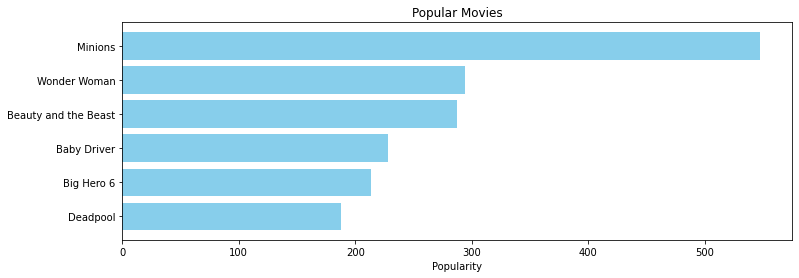

In [ ]:
pop= df3.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

###2. Content Based Filtering

- content-based filtering은 유저,아이템에 대한 정보를 활용하여 추천하는 방식을 의미합니다. 이 방식은 아이템에 대한 정보가 많을 때 유용한 방법입니다.

- Contents Based Filtering 에서는 각각의 사용자와 아이템에 대하여 프로필을 작성하고, 이를 기반으로 추천을 합니다.

- 예를 들어 아이템 1,2,3가 있을 때, 유저가 아이템 2를 선호한다고 하면 1,3중 아이템 2와 더 유사도가 높은 아이템을 추천해주는 알고리즘입니다.
- 영화 추천을 예시로 들어보면, 먼저 사용자에 대해서 성별, 연령대, 지역 등의 프로필을 작성할 수 있습니다. 영화는 장르, 출연하는 배우들, 흥행 여부 등의 프로필을 작성할 수 있습니다.

    - 나와 프로필이 비슷한 다른 사용자가 선호하는 영화를 추천해주는 방식입니다. (user-based recommendation)

    - 특정 영화를 좋아했던 사용자에게 비슷한 영화를 추천합니다. (item-based recommendation)


해당 프로젝트에서는 TF-IDF 방법을 통해 overview 컬럼의 값을 임베딩하여 각 영화 간 유사도를 확인합니다.


In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df3['overview'] = df3['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df3['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(45538, 75827)

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)